# Open Exploration

As we are interested in how dike ring 4 could best balance its economic objectives with a sustainable flood-risk management plan, we would want to first use open exploration to understand how regions in the uncertainty space map to the whole outcome map.

Using open exploration, we will systematically sample the uncertainty or decision space.

## Running the model

Importing all necessary libraries, checking that libraries are up-to-date, and choosing problem formulation.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.0.3
2.4


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [4]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

In [5]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
CategoricalParameter('discount rate 3', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [6]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('0_RfR 3', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('1_RfR 3', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('2_RfR 3', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('3_RfR 3', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('4_RfR 3', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.1_DikeIncrease 3', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
I

In [7]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage 0')
ScalarOutcome('A.1_Dike Investment Costs 0')
ScalarOutcome('A.1_Expected Number of Deaths 0')
ScalarOutcome('A.2_Expected Annual Damage 0')
ScalarOutcome('A.2_Dike Investment Costs 0')
ScalarOutcome('A.2_Expected Number of Deaths 0')
ScalarOutcome('A.3_Expected Annual Damage 0')
ScalarOutcome('A.3_Dike Investment Costs 0')
ScalarOutcome('A.3_Expected Number of Deaths 0')
ScalarOutcome('A.4_Expected Annual Damage 0')
ScalarOutcome('A.4_Dike Investment Costs 0')
ScalarOutcome('A.4_Expected Number of Deaths 0')
ScalarOutcome('A.5_Expected Annual Damage 0')
ScalarOutcome('A.5_Dike Investment Costs 0')
ScalarOutcome('A.5_Expected Number of Deaths 0')
ScalarOutcome('RfR Total Costs 0')
ScalarOutcome('Expected Evacuation Costs 0')
ScalarOutcome('A.1_Expected Annual Damage 1')
ScalarOutcome('A.1_Dike Investment Costs 1')
ScalarOutcome('A.1_Expected Number of Deaths 1')
ScalarOutcome('A.2_Expected Annual Damage 1')
ScalarOutcome('A.2_Dike Investment

In [25]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments,outcomes = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 140 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [26]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 2,A.4_DikeIncrease 3,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,A.5_DikeIncrease 3,EWS_DaysToThreat,scenario,policy,model
0,87.0,302.871553,1.5,0.889279,118.933067,10,0.672281,38.845798,1.5,0.775958,...,6.0,3.0,0.0,7.0,4.0,6.0,1.0,50,4,dikesnet
1,131.0,114.347383,1,0.149029,64.016111,1.5,0.822330,93.712046,1,0.174469,...,6.0,3.0,0.0,7.0,4.0,6.0,1.0,51,4,dikesnet
2,105.0,209.148070,10,0.593732,103.749828,1,0.337723,144.080504,10,0.966808,...,6.0,3.0,0.0,7.0,4.0,6.0,1.0,52,4,dikesnet
3,1.0,266.452694,1.5,0.450167,156.958508,10,0.055496,329.299537,1.5,0.751146,...,6.0,3.0,0.0,7.0,4.0,6.0,1.0,53,4,dikesnet
4,127.0,255.521999,10,0.545104,296.567669,10,0.447796,315.740004,10,0.052834,...,6.0,3.0,0.0,7.0,4.0,6.0,1.0,54,4,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11.0,209.396872,1.5,0.771621,311.218969,1,0.101871,60.404119,10,0.031231,...,9.0,7.0,3.0,4.0,10.0,5.0,1.0,95,7,dikesnet
196,96.0,49.866757,10,0.531621,283.706377,1.5,0.570858,171.029564,1.5,0.110479,...,9.0,7.0,3.0,4.0,10.0,5.0,1.0,96,7,dikesnet
197,116.0,74.059917,10,0.788702,320.243152,1.5,0.270994,104.258692,10,0.308671,...,9.0,7.0,3.0,4.0,10.0,5.0,1.0,97,7,dikesnet
198,79.0,222.948281,1.5,0.648845,159.250446,1,0.412514,189.664882,10,0.390852,...,9.0,7.0,3.0,4.0,10.0,5.0,1.0,98,7,dikesnet


In [27]:
outcomes

{'A.1_Expected Annual Damage 0': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.96929740e+08,
        0.00000000e+00, 0.000000

In [31]:
import pandas as pd
outcomes_new= {k:v.tolist() for k, v in outcomes.items()}

In [32]:
outcomes_new

{'A.1_Expected Annual Damage 0': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  396929740.099567,
  0.0,
  0.0,
  0.0,
  7799979.032379293,
  0.0,
  0.0,
  0.0,
  0.0,
  25035875.228293553,
  351426293.701276,
  16022252.985796172,
  0.0,
  123274395.8560093,
  228190323.82408145,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  350995426.0534315,
  28124661.03482562,
  351175447.88138527,
  0.0,
  0.0,
  517922819.36427605,
  396467194.2068866,
  0.0,
  15967099.010473274,
  87483919.0317828,
  0.0,
  0.0,
  1869177.2445690385,
  59055854.157745644,
  0.0,
  4036168.924379333,
  1466485.2674536267,
  0.0,
  0.0,
  450961528.05083305,
  5446870.764336022,
  5124126.311065043,
  5440830.648397

In [36]:
outcome_df = pd.DataFrame.from_dict(outcomes_new)
outcome_df.head()

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Dike Investment Costs 3,A.3_Expected Number of Deaths 3,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3,A.5_Expected Annual Damage 3,A.5_Dike Investment Costs 3,A.5_Expected Number of Deaths 3,RfR Total Costs 3,Expected Evacuation Costs 3
0,0.0,5.397251e+07,0.0,0.000000e+00,5.941010e+07,0.000000,0.0,4.421502e+07,0.0,0.0,...,5.858367e+07,0.0,0.0,1.958119e+07,0.0,0.0,5.828227e+07,0.0,151900000.0,0.0
1,0.0,5.397251e+07,0.0,0.000000e+00,5.941010e+07,0.000000,0.0,4.421502e+07,0.0,0.0,...,5.858367e+07,0.0,0.0,1.958119e+07,0.0,0.0,5.828227e+07,0.0,151900000.0,0.0
2,0.0,5.397251e+07,0.0,0.000000e+00,5.941010e+07,0.000000,0.0,4.421502e+07,0.0,0.0,...,5.858367e+07,0.0,0.0,1.958119e+07,0.0,0.0,5.828227e+07,0.0,151900000.0,0.0
3,0.0,5.397251e+07,0.0,3.765376e+06,5.941010e+07,0.001933,0.0,4.421502e+07,0.0,0.0,...,5.858367e+07,0.0,0.0,1.958119e+07,0.0,0.0,5.828227e+07,0.0,151900000.0,0.0
4,0.0,5.397251e+07,0.0,0.000000e+00,5.941010e+07,0.000000,0.0,4.421502e+07,0.0,0.0,...,5.858367e+07,0.0,0.0,1.958119e+07,0.0,0.0,5.828227e+07,0.0,151900000.0,0.0


In [37]:
#drop outcomes that are not of interest 
outcomes_of_interest = ['A.4_Expected Annual Damage 0','A.4_Dike Investment Costs 0','A.4_Expected Number of Deaths 0',
                        'A.4_Expected Annual Damage 1','A.4_Dike Investment Costs 1','A.4_Expected Number of Deaths 1',
                        'A.4_Expected Annual Damage 2','A.4_Dike Investment Costs 2','A.4_Expected Number of Deaths 2',
                        'A.4_Expected Annual Damage 3','A.4_Dike Investment Costs 3','A.4_Expected Number of Deaths 3']

In [41]:
outcome_df = outcome_df[outcomes_of_interest]
outcome_df.head()

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.4_Expected Annual Damage 3,A.4_Dike Investment Costs 3,A.4_Expected Number of Deaths 3
0,0.0,1.814408e+07,0.0,0.0,2.758210e+07,0.0,0.0,2.383182e+07,0.0,0.0,1.958119e+07,0.0
1,0.0,1.814408e+07,0.0,0.0,2.758210e+07,0.0,0.0,2.383182e+07,0.0,0.0,1.958119e+07,0.0
2,0.0,1.814408e+07,0.0,0.0,2.758210e+07,0.0,0.0,2.383182e+07,0.0,0.0,1.958119e+07,0.0
3,0.0,1.814408e+07,0.0,0.0,2.758210e+07,0.0,0.0,2.383182e+07,0.0,0.0,1.958119e+07,0.0
4,0.0,1.814408e+07,0.0,0.0,2.758210e+07,0.0,0.0,2.383182e+07,0.0,0.0,1.958119e+07,0.0


## Visual Analysis

[MainProcess/INFO] no time dimension found in results


KeyboardInterrupt: 

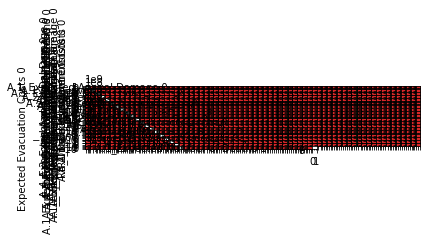

In [44]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=False)
fig.set_size_inches(8,8)
plt.show()